In [1]:
import pandas as pd
import numpy as np
import json
import time
import datetime
import math

# Python3 program to Grouping list 
# elements based on frequency
from collections import Counter
import itertools

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [3]:
df_jobs = pd.read_excel('linkedin_job_details.xlsx')
df_jobs = df_jobs.drop(['Unnamed: 0'], axis=1)
df_jobs['Experience in Years'] = df_jobs['Experience in Years'].fillna("0")
df_jobs['Experience in Years'] = df_jobs['Experience in Years'].astype(int)
df_jobs['Job Skills'] = df_jobs['Job Skills'].fillna("[]")
df_jobs['Job Skills'] = [eval(skills) for skills in list(df_jobs['Job Skills'].values)]
df_jobs['Unlisted Skill'] = df_jobs['Unlisted Skill'].fillna("[]")
df_jobs['Unlisted Skill'] = [eval(skills) for skills in list(df_jobs['Unlisted Skill'].values)]
df_jobs['All Skills'] = df_jobs['Job Skills'] + df_jobs['Unlisted Skill']

In [4]:
df_jobs.head(2)

,Job ID,Post Date,Status,Job Link,Job Title,Job Description,Post Language,Remote,Reposted,Top Card Details,...,Company Link,Company Card Details,Company Size,Industry,Company Description,Associated Skill Phrases,Unlisted Skill,Unlisted Skill Phrases,translated_en,All Skills
0,3772602742,1701295492.606442,LISTED,https://www.linkedin.com/jobs/view/3772602742/,Financial Data Analyst,"About Team\n\nWe are Quadcode, a fintech compa...",en,True,NaN,"['Remote', 'Full-time', 'Mid-Senior level']",...,https://www.linkedin.com/company/quadcodecaree...,"['501-1,000 employees', 'Software Development']","501-1,000 employees",Software Development,Quadcode is a fintech company specializing in ...,"['English', 'Problem Solving', 'Presentation S...","[Software as a Service (SaaS), SQL, Python (Pr...","['SaaS', 'SQL', 'Python']","3772602742, Financial Data Analyst, About Team...","[Analytical Skills, Communication, Attention t..."
1,3768710281,1701295631.953394,LISTED,https://www.linkedin.com/jobs/view/3768710281/,Consultant in Data Analysis and Scientific Pro...,Your Responsibilities\n\nWe are currently look...,en,False,NaN,"['On-site', 'Full-time', 'Mid-Senior level']",...,https://www.linkedin.com/company/climate-analy...,"['51-200 employees', 'Climate Data and Analyti...",51-200 employees,Climate Data and Analytics,Climate Analytics is a global climate science ...,"['Data Analysis', 'Data Visualization', 'Organ...","[Java, Analytics, Application Programming Inte...","['Java', 'Analytics', 'API']","3768710281, Consultant in Data Analysis and Sc...","[Communication, Data Analysis, Data Analytics,..."


In [5]:
# Top Skills
combined_listed_skill_lists = list(itertools.chain.from_iterable(df_jobs['Job Skills'].values))
listed_skills_grouped = list(zip(Counter(combined_listed_skill_lists).keys(), Counter(combined_listed_skill_lists).values()))

combined_unlisted_skill_lists = list(itertools.chain.from_iterable(df_jobs['Unlisted Skill'].values))
unlisted_skills_grouped = list(zip(Counter(combined_unlisted_skill_lists).keys(), Counter(combined_unlisted_skill_lists).values()))

skills = list(set([listed_skills_grouped[n][0] for n in range(len(listed_skills_grouped))] + [unlisted_skills_grouped[n][0] for n in range(len(unlisted_skills_grouped))]))
df_top_skills = pd.DataFrame([], columns = ['Skill Name', 'Listed frequency', 'Unlisted frequency', 'Total'])
for skill in skills:
    dict_entry = {}
    listed_freq = sum([row[1] for row in listed_skills_grouped if row[0] == skill])
    unlisted_freq = sum([row[1] for row in unlisted_skills_grouped if row[0] == skill])

    dict_entry['Skill Name'] = skill
    dict_entry['Listed frequency'] = listed_freq
    dict_entry['Unlisted frequency'] = unlisted_freq
    dict_entry['Total'] = listed_freq + unlisted_freq

    df_top_skills = pd.concat([df_top_skills, pd.DataFrame([dict_entry])], ignore_index=True)
    df_top_skills.reset_index()

In [6]:
df_jobs[['Job ID', 'Post Date', 'Experience Level', 'All Skills']]

,Job ID,Post Date,Experience Level,All Skills
0,3772602742,1701295492.606442,Mid-Senior level,"[Analytical Skills, Communication, Attention t..."
1,3768710281,1701295631.953394,Mid-Senior level,"[Communication, Data Analysis, Data Analytics,..."
2,3773349346,1701295734.449802,Entry level,"[Business Analysis, Dashboards, Data Analytics..."
3,3773351712,1701295567.078773,NaN,"[Cloud Infrastructure, Data Engineering, Data ..."
4,3775291259,1701295891.976814,Mid-Senior level,"[Analytics, Business Intelligence (BI), Data A..."
...,...,...,...,...
1678,3850929186,2024-03-10,Mid-Senior level,"[Analytical Skills, Communication, Analytical ..."
1679,3844057602,2024-03-06,Mid-Senior level,"[Business Insights, Communication, Attention t..."
1680,3844884784,2024-03-07,Mid-Senior level,"[Analytical Skills, Data Analysis, Data Analyt..."
1681,3855874747,2024-03-15,Entry level,"[Analytics, Communication, Computer Science, C..."


In [7]:
df1 = pd.DataFrame([
    [p] + a for P, *a in df_jobs[['All Skills', 'Job ID', 'Post Date', 'Company Name', 'Experience Level']].values
    for p in P
], columns=[['Skills', 'Job ID', 'Post Date', 'Company Name', 'Experience Level']])

df1['YY-MM'] = df1['Post Date']
df1['Total'] = 1
for index in df1.index:
    job_row = df1.loc[index]
    date_post = job_row["Post Date"]
    if type(date_post) == float:
        date_post = datetime.datetime.fromtimestamp(date_post).strftime('%Y-%m-%d')
    # job_row['Post Date'] = datetime.datetime.fromtimestamp(date_post).strftime('%Y-%m-%d')
    date_post = datetime.datetime.strptime(date_post, '%Y-%m-%d').date()
    job_row['Post Date'] = date_post
    job_row['YY-MM'] = str(date_post)[:7]
    df1.loc[index] = job_row
df1.reset_index()
df1.columns = df1.columns.get_level_values(0)
df1

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\3358430542.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_row['Post Date'] = date_post
C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\3358430542.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_row['YY-MM'] = str(date_post)[:7]


,Skills,Job ID,Post Date,Company Name,Experience Level,YY-MM,Total
0,Analytical Skills,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
1,Communication,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
2,Attention to Detail,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
3,B2,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
4,English,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
...,...,...,...,...,...,...,...
20694,User Experience (UX),3843098068,2024-03-05,American Express,Entry level,2024-03,1
20695,User Interface Design,3843098068,2024-03-05,American Express,Entry level,2024-03,1
20696,User Stories,3843098068,2024-03-05,American Express,Entry level,2024-03,1
20697,Transparency,3843098068,2024-03-05,American Express,Entry level,2024-03,1


In [8]:
# df1_grouped = df1.groupby(['Post Date', 'Experience Level', 'Skills']).agg({"Total":"sum"})
df1_grouped = df1.groupby(['Skills']).agg({"Total":"sum"}).sort_values(by=['Total'], ascending = False)
df1_grouped.head(5)

,Total
Skills,
Analytics,614
Data Analytics,589
SQL,582
Data Science,519
Communication,511


In [9]:
df_pivotted = pd.pivot_table(df1, values='Total', index=['YY-MM'], columns=['Company Name', 'Skills'], aggfunc=np.sum)

skills = ['SQL', 'Analytics']

print(df_pivotted.columns.get_level_values(1))
df_pivotted.columns = df_pivotted.columns.get_level_values(1)
df_pivotted = df_pivotted[skills]
print(df_pivotted.columns)
df_pivotted[df_pivotted.isna() == False]

Index(['B2C', 'Data Science', 'Data Visualization', 'Handel',
       'Natural Language Processing (NLP)', 'Predictive Analytics',
       'Representational State Transfer (REST)', 'SOAP', 'SQL', 'Statistics',
       ...
       'Sparring', 'Spoken English', 'Statutory Accounting Principles (SAP)',
       'Strategic Procurement', 'Strategic Sourcing',
       'Supplier Relationship Management', 'Teamwork', 'Ticketing Systems',
       'Trading', 'Trading Strategies'],
      dtype='object', name='Skills', length=11953)
Index(['SQL', 'SQL', 'SQL', 'SQL', 'SQL', 'SQL', 'SQL', 'SQL', 'SQL', 'SQL',
       ...
       'Analytics', 'Analytics', 'Analytics', 'Analytics', 'Analytics',
       'Analytics', 'Analytics', 'Analytics', 'Analytics', 'Analytics'],
      dtype='object', name='Skills', length=559)


C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\988729113.py:1: FutureWarning: The provided callable <function sum at 0x000001B249B62280> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivotted = pd.pivot_table(df1, values='Total', index=['YY-MM'], columns=['Company Name', 'Skills'], aggfunc=np.sum)


Skills,SQL,SQL,SQL,SQL,SQL,SQL,SQL,SQL,SQL,SQL,...,Analytics,Analytics,Analytics,Analytics,Analytics,Analytics,Analytics,Analytics,Analytics,Analytics
YY-MM,,,,,,,,,,,,,,,,,,,,,
2021-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [10]:
df_pivotted = pd.pivot_table(df1, values='Total', index=['YY-MM'],columns='Skills', aggfunc=np.sum)

# ploty
fig = go.Figure()
for col in df_pivotted.columns:
    fig.add_trace(go.Scatter(x=df_pivotted.index, y=df_pivotted[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 )
fig.show()

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\528484293.py:1: FutureWarning: The provided callable <function sum at 0x000001B249B62280> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivotted = pd.pivot_table(df1, values='Total', index=['YY-MM'],columns='Skills', aggfunc=np.sum)


In [11]:
df_pivotted[list(['SQL', 'Analytics'])]

Skills,SQL,Analytics
YY-MM,,
2021-12,1.0,1.0
2022-10,NaN,1.0
2023-03,1.0,1.0
2023-04,1.0,NaN
2023-05,NaN,NaN
2023-08,1.0,1.0
2023-09,9.0,3.0
2023-10,6.0,7.0
2023-11,39.0,40.0


In [12]:
# company_skillframe = df_jobs['Company Name'].unique()
company_skillframe = ['BMW Group']
# experience_skillframe = df_jobs['Experience Level'].unique()
experience_skillframe = ['Entry level']

skillframe_page_jobs = df_jobs.query(
            """`Company Name` in @company_skillframe & `Experience Level` in @experience_skillframe"""
        )
skillframe_page_jobs

,Job ID,Post Date,Status,Job Link,Job Title,Job Description,Post Language,Remote,Reposted,Top Card Details,...,Company Link,Company Card Details,Company Size,Industry,Company Description,Associated Skill Phrases,Unlisted Skill,Unlisted Skill Phrases,translated_en,All Skills
106,3865399409,1711598070.73757,LISTED,https://www.linkedin.com/jobs/view/3865399409/,Full Stack Data Scientist (w/m/x),ALGORITHMS ARE GOOD. ENSURING THEY WORK TOGETH...,en,False,NaN,"['Full-time', 'Entry level']",...,https://www.linkedin.com/company/bmw-group/life,NaN,NaN,NaN,NaN,"['Web Development', 'Web Design', 'TypeScript'...","[English, DevOps, Human Resources (HR), Conflu...","['English', 'DevOps', 'HR', 'Confluence', 'Sta...","3865399409, Full Stack Data Scientist (w/m/x),...","[Data Analytics, Data Science, Predictive Anal..."
219,3865396789,1711601545.32849,LISTED,https://www.linkedin.com/jobs/view/3865396789/,SAP Analytics Innovation Engineer (w/m/x),"VISIONEN BRAUCHEN MENSCHEN, DIE SIE ANSTEUERN....",de,False,NaN,"['Full-time', 'Entry level']",...,https://www.linkedin.com/company/bmw-group/life,NaN,NaN,NaN,NaN,"['Statutory Accounting Principles', 'SAP Busin...","[Analytics, Helm (Software), Looker (Software)...","['Analytics', 'Software', 'Software', 'Softwar...","3865396789, SAP Analytics Innovation Engineer ...","[Artificial Intelligence (AI), Business Techno..."
722,3798203980,1707167856.254079,LISTED,https://www.linkedin.com/jobs/view/3798203980/,Expert Data Management and Business Intelligen...,"Bei der BMW Bank GmbH, einer 100%igen Tochterg...",de,False,NaN,"['On-site', 'Full-time', 'Entry level']",...,https://www.linkedin.com/company/bmw-group/life,NaN,NaN,NaN,NaN,"['Data Management', 'Master Data Management', ...",[Management],['Management'],"3798203980, Expert Data Management and Busines...","[Analytical Skills, Analytics, Data Analytics,..."
879,3819107671,1707169816.525613,LISTED,https://www.linkedin.com/jobs/view/3819107671/,Praktikant Data Analytics & Science Bremsen- u...,THEORETISCH DIE BESTE ENTSCHEIDUNG. PRAKTISCH ...,de,False,NaN,"['Full-time', 'Entry level']",...,https://www.linkedin.com/company/bmw-group/life,NaN,NaN,NaN,NaN,"['Programming Language', 'Analytics', 'Data Vi...","[Human Resources (HR), Amazon Web Services (AWS)]","['HR', 'AWS']","3819107671, Intern Data Analytics & Science Br...","[Analytical Skills, Analytics, Dashboards, Dat..."
881,3778639742,1707169925.318458,LISTED,https://www.linkedin.com/jobs/view/3778639742/,Studienabschlussarbeit Data Analytics Antrieb,MAN KANN DIE ZUKUNFT NICHT VORHERSAGEN. ABER E...,de,False,NaN,"['Full-time', 'Entry level']",...,https://www.linkedin.com/company/bmw-group/life,NaN,NaN,NaN,NaN,"['Analytics', 'Data Modeling', 'Data Visualiza...","[Human Resources (HR), Learning, Python (Progr...","['HR', 'Learning', 'Python']","3778639742, Thesis Data Analytics Drive, YOU C...","[Analytical Skills, Analytics, Data Analytics,..."
951,3815372132,1707172950.525092,LISTED,https://www.linkedin.com/jobs/view/3815372132/,Praktikant Data Analytics (w/m/x),DIE ZUKUNFT DER MOBILITÄT? DIGITAL.\n\nTEILE D...,de,False,NaN,"['Full-time', 'Entry level']",...,https://www.linkedin.com/company/bmw-group/life,NaN,NaN,NaN,NaN,"['Analytics', 'Data Modeling', 'Data Visualiza...",[Human Resources (HR)],['HR'],"3815372132, Praktikant Data Analytics (w/m/x),...","[Analytical Skills, Analytics, Data Analytics,..."
1151,3857550426,2024-03-14,LISTED,https://www.linkedin.com/jobs/view/3857550426/,Machine Learning Spezialist / Data Scientist (...,Die Alphabet Fuhrparkmanagement GmbH ist ein U...,de,False,NaN,"['Full-time', 'Entry level']",...,https://www.linkedin.com/company/bmw-group/life,NaN,NaN,NaN,NaN,"['Robotic Process Automation', 'UiPath', 'Data...","[Automation, Engineering, Learning, Amazon Web...","['Automation', 'Engineering', 'Learning', 'AWS']","3857550426, Machine Learning Spezialist / Data...","[Data Engineering, Data Science, Data Visualiz..."


In [13]:
duration_skillframe = 'Last 2 years'

if duration_skillframe == 'All time':
    skillframe_start_date = None
elif duration_skillframe == 'Last 1 year':
    skillframe_start_date = datetime.date.today() - datetime.timedelta(days=365)
elif duration_skillframe == 'Last 2 years':
    skillframe_start_date = datetime.date.today() - datetime.timedelta(days=730)

if skillframe_start_date is not None:
    skillframe_page_jobs = df1[df1['Post Date'] >= skillframe_start_date]

skillframe_page_jobs

,Skills,Job ID,Post Date,Company Name,Experience Level,YY-MM,Total
0,Analytical Skills,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
1,Communication,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
2,Attention to Detail,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
3,B2,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
4,English,3772602742,2023-11-29,Quadcode,Mid-Senior level,2023-11,1
...,...,...,...,...,...,...,...
20694,User Experience (UX),3843098068,2024-03-05,American Express,Entry level,2024-03,1
20695,User Interface Design,3843098068,2024-03-05,American Express,Entry level,2024-03,1
20696,User Stories,3843098068,2024-03-05,American Express,Entry level,2024-03,1
20697,Transparency,3843098068,2024-03-05,American Express,Entry level,2024-03,1


In [14]:
df_jobs.columns

Index(['Job ID', 'Post Date', 'Status', 'Job Link', 'Job Title',
       'Job Description', 'Post Language', 'Remote', 'Reposted',
       'Top Card Details', 'Experience Level', 'Experience in Years',
       'Work Setting', 'Job Type', 'Job Country', 'Job Skills', 'Pay Salary',
       'Country Code', 'Localized Location', 'Company ID', 'Company Name',
       'Company Link', 'Company Card Details', 'Company Size', 'Industry',
       'Company Description', 'Associated Skill Phrases', 'Unlisted Skill',
       'Unlisted Skill Phrases', 'translated_en', 'All Skills'],
      dtype='object')

In [15]:
salary_df_columns = ['Job ID', 'Job Title', 'Company Name', 'Experience Level', 'Experience in Years', 'Pay Salary', 'Min (Range)', 'Max (Range)', 'AVG (Range)', 'Salary (Bucket)']
salary_df = pd.DataFrame([], columns = salary_df_columns)

for index in df_jobs.index:
    job_row = df_jobs.loc[index]

    if job_row['Pay Salary'] is None:
        continue

    salary_range_min = None
    try:
        salary_range_min = str(job_row['Pay Salary']).split(' - ')[0]
        salary_range_min = round(float(str(salary_range_min).replace('/yr', '')), -4)
    except:
        salary_range_min = None
    
    salary_range_max = None
    try:
        salary_range_max = str(job_row['Pay Salary']).split(' - ')[1]
        salary_range_max = round(float(str(salary_range_max).replace('/yr', '')), -4)
    except:
        salary_range_max = None

    salary_dict = {}

    salary_dict['Job ID'] = job_row["Job ID"]
    salary_dict['Job Title'] = job_row["Job Title"]
    salary_dict['Company Name'] = job_row["Company Name"]
    salary_dict['Experience Level'] = job_row["Experience Level"]
    salary_dict['Experience in Years'] = float(job_row["Experience in Years"])
    salary_dict['Pay Salary'] = str(job_row["Pay Salary"])
    salary_dict['Min (Range)'] = salary_range_min
    salary_dict['Max (Range)'] = salary_range_max
    salary_dict['AVG (Range)'] = np.average([value for value in [salary_range_min, salary_range_max] if value is not None])

    if salary_range_min is None:
        salary_dict['Salary (Bucket)'] = None
        salary_df = pd.concat([salary_df, pd.DataFrame([salary_dict])], ignore_index=True)
    elif salary_range_max is None:
        salary_dict['Salary (Bucket)'] = salary_range_min
        salary_df = pd.concat([salary_df, pd.DataFrame([salary_dict])], ignore_index=True)
    elif salary_range_max is not None:
        salary_interval = 10000
        for interval_index in range(0, int((round(salary_range_max, -4)-round(salary_range_min, -4))/salary_interval)+1):
            salary_dict['Salary (Bucket)'] = round(salary_range_min, -4) + salary_interval*interval_index
            # print(f'({salary_dict["Job ID"]}) {str(job_row["Pay Salary"])} (Min): {round(salary_range_min, -4) + salary_interval*interval_index}')
            salary_df = pd.concat([salary_df, pd.DataFrame([salary_dict])], ignore_index=True)
        # salary_dict['Salary (Bucket)'] = salary_range_min
        # salary_df = pd.concat(salary_df, [salary_dict], ignore_index=True)

    salary_df.reset_index()
    # print(f'{str(job_row["Pay Salary"])} (Min): {salary_dict["Min (Range)"]}')
    # # print(salary_range_min)
    # # print(salary_range_min == math.nan)
    # print(f'{str(job_row["Pay Salary"])} (Max): {salary_dict["Max (Range)"]}')
    # print(f'{str(job_row["Pay Salary"])} (AVG): {salary_dict["AVG (Range)"]}')

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\1643071794.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\1643071794.py:47: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\1643071794.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\1643071794.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\1643071794.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\naimi\AppData\Local\Temp\ipykernel_22840\1643071794.py:41: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

In [16]:
salary_df[(salary_df["Salary (Bucket)"] == 60000)].groupby(["Salary (Bucket)", "Experience Level", "Experience in Years"]).count()
# salary_df[(salary_df["Experience Level"] == "Mid-Senior level") & (salary_df["Salary (Bucket)"] == 60000)]

Job ID  Job Title  \
Salary (Bucket) Experience Level Experience in Years                      
60000.0         Associate        0.0                       7          7   
                Director         8.0                       2          2   
                Entry level      0.0                      15         15   
                                 1.0                       3          3   
                                 3.0                       2          2   
                Mid-Senior level 0.0                      25         25   
                                 2.0                       2          2   
                                 3.0                      13         13   
                                 4.0                       3          3   
                                 5.0                      18         18   
                                 6.0                       2          2   
                                 8.0                       2          2   
                                 9.0                       1          1   

                                                      Company Name  \
Salary (Bucket) Experience Level Experience in Years                 
60000.0         Associate        0.0                             6   
                Director         8.0                             2   
                Entry level      0.0                            15   
                                 1.0                             3   
                                 3.0                             2   
                Mid-Senior level 0.0                            25   
                                 2.0                             2   
                                 3.0                            13   
                                 4.0                             3   
                                 5.0                            18   
                                 6.0                             2   
                                 8.0                             2   
                                 9.0                             1   

                                                      Pay Salary  Min (Range)  \
Salary (Bucket) Experience Level Experience in Years                            
60000.0         Associate        0.0                           7            7   
                Director         8.0                           2            2   
                Entry level      0.0                          15           15   
                                 1.0                           3            3   
                                 3.0                           2            2   
                Mid-Senior level 0.0                          25           25   
                                 2.0                           2            2   
                                 3.0                          13           13   
                                 4.0                           3            3   
                                 5.0                          18           18   
                                 6.0                           2            2   
                                 8.0                           2            2   
                                 9.0                           1            1   

                                                      Max (Range)  AVG (Range)  
Salary (Bucket) Experience Level Experience in Years                            
60000.0         Associate        0.0                            6            7  
                Director         8.0                            2            2  
                Entry level      0.0                           15           15  
                                 1.0                            3            3  
                                 3.0                            2            2  
                Mid-Senior level 0.0                           25           25  
             

In [17]:
df_to_display = salary_df[salary_df["Experience Level"] == "Mid-Senior level"]

# df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count()
df_to_display = df_to_display[["Salary (Bucket)", "Experience in Years", "Experience Level", "Job ID"]]
# df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count().reset_index()
df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years", "Experience Level", "Job ID"]).count()
df_to_display['Frequency'] = 1
df_to_display

Frequency
Salary (Bucket) Experience in Years Experience Level Job ID               
20000.0         3.0                 Mid-Senior level 3776939535          1
                4.0                 Mid-Senior level 3896600161          1
                6.0                 Mid-Senior level 3889413261          1
30000.0         0.0                 Mid-Senior level 3877863527          1
                3.0                 Mid-Senior level 3776939535          1
...                                                                    ...
260000.0        3.0                 Mid-Senior level 3886928809          1
270000.0        3.0                 Mid-Senior level 3886928809          1
280000.0        3.0                 Mid-Senior level 3886928809          1
290000.0        3.0                 Mid-Senior level 3886928809          1
300000.0        3.0                 Mid-Senior level 3886928809          1

[617 rows x 1 columns]

In [48]:
# salary_df[(salary_df["Experience Level"] == "Mid-Senior level") & (salary_df["Salary (Bucket)"] == 60000)].count()
salary_df[(salary_df["Experience Level"] == "Mid-Senior level")].count()


Job ID                 1151
Job Title              1151
Company Name           1151
Experience Level       1151
Experience in Years    1151
Pay Salary             1151
Min (Range)             617
Max (Range)             600
AVG (Range)             617
Salary (Bucket)         617
dtype: int64

In [49]:
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [51]:
def get_greyscale_bar_color(df):
    fig = go.Figure()
    fig = px.bar(df,
                x='Salary (Bucket)',
                y='Frequency',
                #  title='Test',
                color='Experience in Years',
                barmode='overlay',
                opacity = 0.5,
                color_continuous_scale = "greys")
    
    color = fig.data[0]['marker']['color']

    return color

In [70]:
df_to_display = salary_df[salary_df["Experience Level"] == "Mid-Senior level"]

# df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count()
df_to_display = df_to_display[["Salary (Bucket)", "Experience in Years"]]
# df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count().reset_index()
# df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count().reset_index()
df_to_display = df_to_display.reset_index()
df_to_display['Frequency'] = [list(df_to_display[(df_to_display["Salary (Bucket)"] == df_to_display.iloc[i]["Salary (Bucket)"]) 
                                    & (df_to_display["Experience in Years"] <= df_to_display.iloc[i]["Experience in Years"])].count())[0] for i in df_to_display.index]
# df_to_display[df_to_display['Salary (Bucket)'] == 60000]
# dfg=dfg.rename(columns={"User": "Users"})

# plot structure
fig = go.Figure()
fig = px.bar(df_to_display,
             x='Salary (Bucket)',
             y='Frequency',
            #  title='Test',
             color='Experience in Years',
             barmode='overlay',
             opacity = 0.5)

print(get_greyscale_bar_color(df_to_display))
# fig.data[0]['marker']['color'] = get_greyscale_bar_color(df_to_display)
print(fig.data[0]['marker']['color'])
print(fig.layout['coloraxis']['colorscale'])
print(fig)
# fig.add_traces(list(px.bar(df_to_display,
#              x='Salary (Bucket)',
#              y='Frequency',
#             #  title='Test',
#              color='Experience in Years',
#              barmode='overlay',
#              opacity = 0.5,
#              color_continuous_scale = "greys").select_traces()))

# print(fig.data[0]['showlegend'])
fig.update_traces(width = 10000, showlegend = False)

# # plot
fig.show()

[2. 0. 0. ... 5. 5. 5.]
[2. 0. 0. ... 5. 5. 5.]
((0.0, '#0d0887'), (0.1111111111111111, '#46039f'), (0.2222222222222222, '#7201a8'), (0.3333333333333333, '#9c179e'), (0.4444444444444444, '#bd3786'), (0.5555555555555556, '#d8576b'), (0.6666666666666666, '#ed7953'), (0.7777777777777778, '#fb9f3a'), (0.8888888888888888, '#fdca26'), (1.0, '#f0f921'))
Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('Salary (Bucket)=%{x}<br>Freque' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([2., 0., 0., ..., 5., 5., 5.]),
                         'coloraxis': 'coloraxis',
                         'opacity': 0.5,
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([    nan,     nan,     nan, .

In [33]:
fig = go.Figure()
# fig = px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", barmode = "overlay", pattern_shape='Experience in Years')

for value in salary_df["Experience Level"].unique():
    df_to_display = salary_df[salary_df["Experience Level"] == value]
    df_to_display = df_to_display[["Salary (Bucket)", "Experience in Years"]]
    # df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years", "Experience Level", "Job ID"]).count().reset_index()
    # df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count().reset_index()
    df_to_display = df_to_display.reset_index()
    df_to_display['Frequency'] = [list(df_to_display[(df_to_display["Salary (Bucket)"] == df_to_display.iloc[i]["Salary (Bucket)"]) 
                                    & (df_to_display["Experience in Years"] <= df_to_display.iloc[i]["Experience in Years"])].count())[0] for i in df_to_display.index]

    # plot structure
    fig2 = go.Figure()
    fig2 = px.bar(df_to_display,
                x='Salary (Bucket)',
                y='Frequency',
                # title='Test',
                color='Experience in Years',
                barmode='overlay',
                opacity = 0.01,
                color_continuous_scale = "greys")
    # fig2.data[0]['showlegend'] = False
    # fig2.update_layout(showlegend = False)
    fig.add_traces(list(fig2.select_traces()))
    # fig.add_trace(fig2.data[0])

    # fig.add_traces(list(px.bar(df_to_display,
    #             x='Salary (Bucket)',
    #             y='Frequency',
    #             #  title='Test',
    #             color='Experience in Years',
    #             barmode='overlay',
    #             opacity = 0.5,
    #             color_continuous_scale = "greys").select_traces()))

# fig.add_traces(list(px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", opacity = 0.5).select_traces()))
fig.update_layout(width = 1000, barmode = "overlay")
fig.show()

In [26]:
px.bar(df_to_display,
                x='Salary (Bucket)',
                y='Frequency',
                # title='Test',
                color='Experience in Years',
                barmode='overlay',
                opacity = 0.5,
                color_continuous_scale = "greys")

In [22]:
fig = go.Figure()
# fig = px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", opacity = 0.5)
# fig.add_traces(list(px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", opacity = 0.5).select_traces()))
# fig.update_layout(width = 1000, barmode = "overlay")
# fig.update_layout(barmode = "overlay")
# fig.show()

for value in salary_df["Experience Level"].unique():
    df_to_display = salary_df[salary_df["Experience Level"] == value]
    df_to_display = df_to_display[["Salary (Bucket)", "Experience in Years"]]
    # df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years", "Experience Level", "Job ID"]).count().reset_index()
    # df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count().reset_index()
    df_to_display = df_to_display.reset_index()
    df_to_display['Frequency'] = [list(df_to_display[(df_to_display["Salary (Bucket)"] == df_to_display.iloc[i]["Salary (Bucket)"]) 
                                    & (df_to_display["Experience in Years"] <= df_to_display.iloc[i]["Experience in Years"])].count())[0] for i in df_to_display.index]

    # plot structure
    fig2 = go.Figure()
    fig2 = px.bar(df_to_display,
                x='Salary (Bucket)',
                y='Frequency',
                # title='Test',
                color='Experience in Years',
                barmode='overlay',
                opacity = 0.01,
                color_continuous_scale = "greys")
    # fig2.data[0]['showlegend'] = False
    # fig2.update_layout(showlegend = False)
    # fig.add_traces(list(fig2.select_traces()))
    fig.add_trace(fig2.data[0])
    # fig.update_traces(width = 10000)
# fig.update_layout(width = 1000)

fig.add_traces(list(px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", opacity = 0.5).select_traces()))
fig.update_layout(width = 1000, barmode = "overlay")
fig.update_layout(showlegend = True)
fig.show()

In [23]:
fig = go.Figure()
# fig = px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", barmode = "overlay", pattern_shape='Experience in Years')
fig.add_traces(list(px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", opacity = 0.5).select_traces()))
fig.update_layout(barmode = "overlay")

for value in salary_df["Experience Level"].unique():
    df_to_display = salary_df[salary_df["Experience Level"] == value]
    df_to_display = df_to_display[["Salary (Bucket)", "Experience in Years", "Experience Level", "Job ID"]]
    df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years", "Experience Level", "Job ID"]).count().reset_index()
    # df_to_display = df_to_display.groupby(["Salary (Bucket)", "Experience in Years"]).count().reset_index()
    df_to_display['Frequency'] = 1
    df_to_display
    # dfg=dfg.rename(columns={"User": "Users"})

    # plot structure
    # fig = go.Figure()
    fig.add_traces(list(px.bar(df_to_display,
                x='Salary (Bucket)',
                y='Frequency',
                # title='Test',
                color='Experience in Years',
                barmode='stack',
                opacity = 0.25,
                color_continuous_scale = "greys").select_traces()))
    # fig.update_traces(width = 10000)

# fig.update_layout(barmode = "overlay")
fig.update_layout(width = 1000)
# fig.layout()
fig.show()

In [93]:
fig = px.histogram(salary_df, x="Salary (Bucket)", color = "Experience Level", barmode = "overlay")
# fig.layout()
fig.show()

# g = sns.displot(data=salary_df, x='Salary (Bucket)', col='Experience Level', hue='Experience in Years', edgecolor='black', kde=False)
# g.set(xlabel='Salary', ylabel='Frequency')

# salary_df.groupby('Experience Level').hist()

# fig, ax = plt.subplots()
# for a in salary_df['Experience Level'].unique():
#     # sns.displot(salary_df[salary_df['Experience Level'] == a], bins=range(1, 110, 10), ax=ax, kde=False)
#     sns.displot(salary_df[salary_df['Experience Level'] == a], ax=ax, kde=False)
# # ax.set_xlim([0, 100])


salary_range_min = np.min(salary_df['Max (Range)'])
salary_range_max = np.max(salary_df['Max (Range)'])
bins = np.linspace(salary_range_min, salary_range_max, int((salary_range_max - salary_range_min)/10000)+1)

# plt.hist(salary_df[salary_df['Experience Level'] == 'Entry level']['Salary (Bucket)'].values, bins=bins, alpha=0.5, label='x')
# plt.hist(salary_df[salary_df['Experience Level'] == 'Internship']['Salary (Bucket)'].values, bins=bins, alpha=0.5, label='y')
# px.histogram(salary_df, x="Salary (Bucket)", color='Experience Level')
# px.histogram(salary_df[salary_df['Experience Level'] == 'Entry level']['Salary (Bucket)'].values)
# px.histogram(salary_df[salary_df['Experience Level'] == 'Internship']['Salary (Bucket)'].values)

# sns.displot(data=salary_df[salary_df['Experience Level'] == 'Entry level'], x='Salary (Bucket)', hue='Experience in Years', edgecolor='black', color='red', alpha=0.5)
# sns.displot(data=salary_df[salary_df['Experience Level'] == 'Internship'], x='Salary (Bucket)', hue='Experience in Years', edgecolor='black', color='green', alpha = 0.5)
# sns.displot(data=salary_df, x='Salary (Bucket)', hue='Experience in Years', edgecolor='black')
# plt.legend(loc='upper right')
# plt.show()

# sns.histplot(data=salary_df, alpha=0.5, log_scale=True, multiple='layer')

# #creating subplots
# ax=plt.subplots()

# #plotting columns
# ax=sns.barplot(x=salary_df[salary_df['Experience Level'] == 'Internship'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].index, y=salary_df[salary_df['Experience Level'] == 'Internship'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].values, color = 'lime')
# ax=sns.barplot(x=salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].index, y=salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].values, color = 'green')
# # ax=sns.barplot(x=salary_df.index,y=salary_df["Z"],color = 'green')
# #renaming the axes
# ax.set(xlabel="x-axis", ylabel="y-axis")
 
# # visualizing illustration
# plt.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'E'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

In [56]:
salary_df[salary_df['Experience Level'] == 'Director']['Salary (Bucket)'].values

array([    nan,     nan, 130000., 140000., 150000., 160000., 170000.,
       180000., 190000., 200000.,     nan,     nan,     nan, 180000.,
       190000., 200000., 210000., 150000., 160000., 170000., 180000.,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan,     nan,     nan, 250000., 260000., 270000.,
       280000., 290000., 300000., 310000., 320000., 330000., 340000.,
       350000., 360000.,     nan,     nan,     nan, 150000., 160000.,
       170000., 180000., 190000., 120000., 130000., 140000., 120000.,
       130000., 140000.])

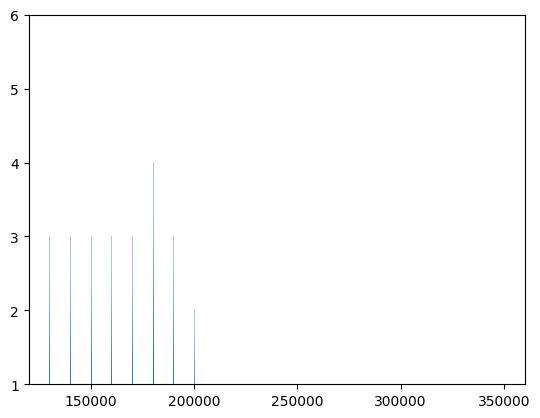

In [84]:
def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


fig, ax = plt.subplots()
xlim_min = np.min(salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].index)
xlim_max = np.max(salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].index)
ylim_min = np.min(salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].values)
ylim_max = np.max(salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].values)


ax.set(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max+2))

# background image
# gradient_image(ax, direction=0, extent=(0, 1, 0, 1), transform=ax.transAxes,
#                cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

N = 10
x = salary_df[salary_df['Experience Level'] == 'Director']['Salary (Bucket)'].index
x = salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].index
y = salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].values
# y = salary_df[salary_df['Experience Level'] == 'Director']['Salary (Bucket)'].values
# df1.groupby(['Skills']).agg({"Total":"sum"}).sort_values(by=['Total'], ascending = False)
# x = np.arange(N) + 0.15
# y = np.random.rand(N)

gradient_bar(ax, x, y, width=1)
plt.show()

In [90]:
from plotly.offline import plot

layout = {}
traces = []

traces.append({'x': salary_df[salary_df['Experience Level'] == 'Director'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].index, 'name': 'Director', 'opacity': 0.6})
traces.append({'x': salary_df[salary_df['Experience Level'] == 'Internship'].groupby(['Salary (Bucket)']).agg({"Salary (Bucket)":"count"})['Salary (Bucket)'].index, 'name': 'Internship', 'opacity': 0.6})

# For each trace, add elements which are common to both.
for t in traces:
    t.update({'type': 'histogram',
              'histfunc': 'count'})

layout['barmode'] = 'overlay'

plot({'data': traces, 'layout': layout})

'temp-plot.html'